<a href="https://colab.research.google.com/github/CodeScribbl/AIML/blob/main/notebook/Questioning_the_Answers_LLMs_enter_the_Boardroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questioning the Answers: LLMs enter the Boardroom
Using Gen AI Tools to Harness Alpha from Earnings Calls
by S&P Global Market Intelligence's Quantitative Research & Solutions (QRS) Group

1. Overview

Earnings calls play a pivotal role in shaping investor perceptions. The quality of communication between executives and analysts can significantly influence company performance.
**Efficient Communicators**—executives who deliver proactive presentations, anticipate market queries, and provide clear, on-topic answers to analysts’ questions—consistently outperform their peers.
Conversely, **Total Redirectors**—executives who are reactive, fail to address analysts’ key inquiries during presentations, and provide off-topic responses—significantly underperform.

Executives' ability to anticipate investor concerns and maintain a focused dialogue fosters confidence and strategic communication. In contrast, failing to provide clarity when analysts seek additional information can lead to misalignment and breakdowns in transparency. A long (short) portfolio of Efficient Communicators (Total Redirectors) generates +515bps of annualized alpha.

This notebook serves as the blueprint for the research detailed in **Quantitative Research & Solutions**’ recent publication, "Questioninig the Answers: LLM's enter the Boardroom." It analyse executive on-topicness and proactiveness using the analysts questions, executives answers and LLM answers. This research harness alpha using LLM tools, including vector embeddings, vector cosine similarity, and the LLM quesiton answering.

\**This starter notebook uses different embedding and completion LLM models compared to those used in the paper. As a result, the factor scores here differ from the ones presented in our research. While this notebook demonstrates the factor construction for a single company, the research systematically processed 180,000 transcripts.*

#### 1.1: Request a 1:1 meeting

###  We’re here to help you accelerate your journey from data to insight.

S&P Global Marketplace Workbench is a web-based, cloud hosted environment that allows you to experiment with datasets from S&P Global and curated third-party providers. Leverage Workbench’s analytical capabilities to perform data analysis or build models within collaborative notebooks that support multiple coding languages, built-in data visualizations, and automatic versioning, enabling you to deliver impactful and unique solutions for your business.

<a target="_blank" rel="noopener noreferrer" href="https://pages.marketintelligence.spglobal.com/Workbench-Notebooks-Demo-Request.html">Click here - to view and experiment with the code and S&P Global datasets behind the research and request a 1:1 meeting.</a>


#  2. Datasets

|Name|Type|Description|
|---|---|---|
| <a target="_blank" rel="noopener noreferrer" href="https://www.marketplace.spglobal.com/en/datasets/index-data-(100)">Index Data</a> |<a target="_blank" rel="noopener noreferrer" href="https://www.marketplace.spglobal.com/en/datasets"> Datasets | The premium index benchmarking data from major index providers allows investors to track and simulate index performance, and are fully integrated and linked within the S&P Global Market Intelligence data ecosystem, so you can focus on your investment strategy. Premium index data available via Xpressfeed covers index returns (prices), as well as licensed index and their index constituent data all in one place.|
| <a target="_blank" rel="noopener noreferrer" href="https://www.marketplace.spglobal.com/en/datasets/s-p-capital-iq-financials-(10)">S&P Capital IQ Financials</a> |<a target="_blank" rel="noopener noreferrer" href="https://www.marketplace.spglobal.com/en/datasets"> Datasets |S&P Capital IQ Financials provides global standardized financial statement data for over 180,000 companies, including over 95,000 active and inactive public companies, and As Reported data for over 150,000 companies. S&P Capital IQ Standardized Financials allows you to extend the scope of your historical analysis and back-testing models with consistent data from all filings of a company's historical financial periods including press releases, original filings, and all restatements.|
| <a target="_blank" rel="noopener noreferrer" href="https://www.marketplace.spglobal.com/en/datasets/global-events-(11)">Global Events</a> |<a target="_blank" rel="noopener noreferrer" href="https://www.marketplace.spglobal.com/en/datasets"> Datasets |The Global Events dataset provides details on upcoming and past corporate events such as earnings calls, shareholder/analyst meetings, expected earnings release dates and more. With deep history back to 2003, clients can leverage this dataset to derive signals and support trading models across asset classes, trading styles and frequencies. This dataset also helps in research & analysis, risk management & compliance, and trade surveillance workflows.|
| <a target="_blank" rel="noopener noreferrer" href="https://www.marketplace.spglobal.com/en/datasets/gics-(90)">GICS®</a> |<a target="_blank" rel="noopener noreferrer" href="https://www.marketplace.spglobal.com/en/datasets"> Datasets |The GICS dataset includes global industry classifications for public companies, both current and historical. Leverage GICS, jointly developed by S&P Global and MSCI, for a complete, consistent set of global sector and industry definitions. GICS has become the standard widely recognized by market participants worldwide. The GICS methodology assigns each public company to a sub-industry and corresponding industry, industry group and sector, according to the definition of its principle business activity. The current GICS sectors include Energy, Materials, Industrials, Consumer Discretionary, Consumer Staples, Health Care, Financials, Information Technology, Communication Services, Utilities, and Real Estate.|
| <a target="_blank" rel="noopener noreferrer" href="https://www.marketplace.spglobal.com/en/datasets/compustat-financials-(8)">Compustat</a> |<a target="_blank" rel="noopener noreferrer" href="https://www.marketplace.spglobal.com/en/datasets"> Datasets |Compustat Financials provides standardized North American and global financial statements and market data for over 80,000 active and inactive publicly traded companies that financial professionals have relied on for over 50 years. Compustat allows investment professionals, academic researchers, and industry analysts to combine deep history with robust and consistent data standardization into their research and backtesting to produce valuable insights and generate alpha. With historical data for North America as far back as 1950 and point-in-time snapshots beginning in 1987, Compustat provides you with insight into company financial performance across many different economic cycles not available anywhere else.|




## Support Resources
---

- <a href = "https://www.marketplace.spglobal.com/en/" target = "_blank">Marketplace</a>
  - Explore premium fundamental and alternative datasets available seamlessly via Cloud, Data Feed, API Solutions, and Capital IQ Pro, along with expert analysis you won't find anywhere else.
<br>

- [Query Library](https://www.marketplace.spglobal.com/en/support/query-library)
  - Search a comprehensive library of pre-built queries designed to help you quickly maximize the value of our data offerings. For each query, the library provides a brief description along with the data packages necessary to execute the query.
<br>

- [Support Center](https://www.support.marketplace.spglobal.com/en/)
  - We are here to help. Access resources to help you make the most of our premium fundamental and alternative datasets, along with robust solutions, available on the S&P Global Marketplace.
<br>

- If you're experiencing any technical issues with our Data Delivery Channels, Platforms, Solutions, and/or Workbench, please reach out to our support team at support.datafeed.mi@spglobal.com for assistance.

#3. Libraries & User Inputs
Import Pyspark and any other libraries required for workflow

3.1 Libraries

In [ ]:
%pip install nltk
%pip install openai
%pip install tiktoken

##3.2 Date Dimension

In [ ]:
beginDate = '2000-01-01' #start of period for analysis
endDate = '2023-12-31' #end of period for analysis

#get a list of dates from beginDate to endDate
(
  spark.sql('''
      with calendarDates as(
      select explode(sequence(to_date('2000-01-01'), to_date('2030-12-31'), interval 1 day)) as calendarDate)
      select
          calendarDate AS Date,
          YEAR(calendarDate) AS Year,
          MONTH(calendarDate) AS Month,
          DAY(calendarDate) AS Day,
          QUARTER(calendarDate) AS Quarter,
          MIN(calendarDate) OVER (PARTITION BY YEAR(calendarDate), QUARTER(calendarDate)) AS FirstDayOfQuarter,
          MAX(calendarDate) OVER (PARTITION BY YEAR(calendarDate), QUARTER(calendarDate)) AS LastDayOfQuarter
      from calendarDates
      order by calendarDate asc
      ''')
    .createOrReplaceTempView('date_dimension')
)

##3.3 User Inputs

Input your api key here to get access to your LLM model. Beaware of the cost associated with your LLM query. This research invloves the usage of an embedding model and a completion model, the default models were set to "databricks-gte-large-en" for embedding and "databricks-meta-llama-3-1-70b-instruct" for completion. This user input section gives you the flexibility to chose your own model for the task.

For questions, please reach out to the WB Support Team: CIQWorkbenchSupport@spglobal.com

In [ ]:
my_api_key= ##'<Insert Personal LLM API Key>'
base_url = "https://spg-marketplace-workbench-42h04.cloud.databricks.com/serving-endpoints"

embedding_model = "databricks-gte-large-en"
completion_model = "databricks-meta-llama-3-1-70b-instruct"

# 4. Working with the Data: Russell 3000 Transcripts

In this section we query all available Russell 3000 constituent transcripts.

##4.1 Index Data

###4.1.1 Russell 3000 Constituents

In the cells below we set the date range for the analysis. The Russell constituents list is collected and formatted to show the daily constituents, including their date, GICS sector and calendarYearQuarter.

In [ ]:
df_indexcon = spark.sql("""


select distinct
c.companyId, c.companyName
, s.securityId
, ic.tradingItemId, i.indexId, i.indexName, ic.constituentId
, ti.tickerSymbol, e.exchangeSymbol as exchangeSymbol
, concat(e.exchangeSymbol, ' : ', ti.tickerSymbol) as exchangeTicker
, to_date(ic.fromDate) as fromDate, to_date(ifnull(ic.toDate,current_date())) as toDate

from indexData.ciqIndex i
    join indexData.ciqindexConstituent ic on ic.indexId=i.indexId
    join basedata.ciqTradingItem ti on ti.tradingItemId=ic.tradingItemId
    join basedata.ciqExchange e on e.exchangeId=ti.exchangeId
    join basedata.ciqSecurity s on s.securityId=ti.securityId
    join (select companyId, companyName from basedata.ciqCompany c) c on c.companyId=s.companyId
where i.indexId in (
--2668699 --S&P 500
--2668861 --S&P 100
2668795 --Russell 3000
)

""")

df_indexcon.write.mode("overwrite").option("compression", "snappy").parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents.parquet")

display(df_indexcon.limit(5))

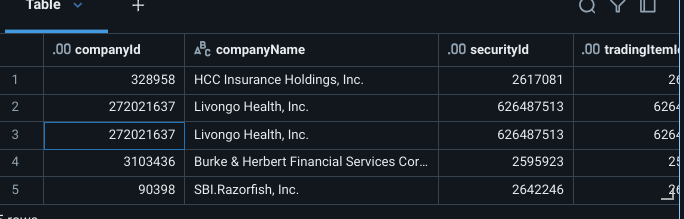

###4.1.2 Enrich Russell 3000 Constituents with sector and calendar year quarter

In [ ]:
spark.read.parquet('dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents.parquet').createOrReplaceTempView('R3000HISTORYTOPRESENT')

df_indexcon = spark.sql("""


select
    dd.firstDayOfQuarter, dd.lastDayOfQuarter,
    concat(dd.year, '-', dd.quarter) as calendarYearQuarter,
    concat(cp.fiscalYear, '-', cp.fiscalQuarter) as fiscalYearQuarter,
    cpt.periodTypeName, cpt.periodTypeDescription,
    r.companyId, r.companyName, r.tradingItemId, gs.gicDesc as Sector, gg.gicDesc as SectorGroup, gind.gicDesc as Industry, gsi.gicDesc as subIndustry
from (select * from DATE_DIMENSION where date = firstDayOfQuarter) dd
    join R3000HISTORYTOPRESENT r on dd.date between ifnull(r.fromDate, '1950-01-01') and ifnull(r.toDate, '2050-12-31')
    join ciqfundamentals.ciqFinPeriod cp on r.companyId = cp.companyId and dd.year = cp.calendarYear and dd.quarter = cp.calendarQuarter
    join events.ciqEventPeriodType cpt on cp.periodTypeId = cpt.periodTypeId

    left join basedata.ciqGvkeyIID gi on gi.RELATEDCOMPANYID=r.companyId and gi.objectId=r.tradingItemId and dd.FirstDayOfQuarter between ifnull(gi.symbolStartDate,'1950-01-01') and ifnull(gi.symbolEndDate,'2050-01-01')
    left join companyIndustry.gic_history gic on gic.GVKEY=gi.GVKEY and dd.FirstDayOfQuarter between ifnull(gic.indFrom,'1950-01-01') and ifnull(gic.indthru,'2050-01-01')
    left join compustat.r_giccd gs on gs.giccd=gic.gsector
    left join compustat.r_giccd gg on gg.giccd=gic.ggroup
    left join compustat.r_giccd gind on gind.giccd=gic.gind
    left join compustat.r_giccd gsi on gsi.giccd=gic.gsubind

where 1=1
    and date between '2000-01-01' and '2024-12-31'
    and cp.periodTypeId = 2 --Fiscal/Calendar Quarter
order by calendarYearQuarter asc, companyId asc

""")

df_indexcon.write.mode("overwrite").option("compression", "snappy").parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_Sectors.parquet")

display(df_indexcon.limit(5))

##4.2 Machine Readable Transcripts

###4.2.1 Collect TranscriptId


In [ ]:
spark.read.parquet('dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_Sectors.parquet').createOrReplaceTempView('R3000HISTORYTOPRESENT_SECTORS')

df_transcript = spark.sql("""

select * from
(select
    ice.*, t.transcriptId, row_number() over (partition by fiscalYearQuarter, tradingItemId, ice.keyDevId order by t.transcriptCreationDateUTC desc) as latestTranscriptforKeyDev_Flag

from
(select
    ice.calendarYearQuarter, ice.fiscalYearQuarter, ice.tradingItemId, ice.companyId, ice.companyName, eot.keyDevId, e.headline, e.mostImportantDateUTC, enteredDate, bi.periodEndDate, languageId, keydeveventtypeid, row_number() over (partition by ice.tradingItemId, bi.fiscalYear, bi.fiscalQuarter order by e.lastModifiedDate desc) as latestKeyDev_Flag
from R3000HISTORYTOPRESENT_SECTORS ice
    join events.ciqEventToObjectToEventType eot on ice.companyId = eot.objectId and eot.keydeveventtypeid=48
    join events.ciqEvent e on eot.keydevid = e.keydevid
    join events.ciqEventCallBasicInfo bi on bi.keyDevId=e.KeyDevId and concat(bi.fiscalYear,'-',bi.fiscalQuarter) = ice.fiscalYearQuarter

where bi.languageId in (0, 123) OR bi.languageId IS NULL --English
--where ice.companyId = 13289149
) ice
    left join machinereadabletranscripts.ciqTranscript t on t.keyDevId=ice.keyDevId
where 1=1
    and t.transcriptId is not null
    and latestKeyDev_Flag = 1)
where latestTranscriptforKeyDev_Flag = 1
order by calendarYearQuarter asc, tradingItemId asc

""")

df_transcript.write.mode("overwrite").option("compression", "snappy").parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_Transcript.parquet")

display(df_transcript.limit(5))

###**4.2.2 Collect TranscriptId Components

This **query takes about 30 minutes** to executive since it is collecting all Russell 3000 transcript components in the history.

In [ ]:
spark.read.parquet('dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_Transcript.parquet').createOrReplaceTempView('R3000HISTORYTOPRESENT_Transcript')

df_transcriptComponents = spark.sql("""

select distinct
    u.*
    , speakerTypeName
    , tp.transcriptPersonName
    , tp.transcriptPersonId
    , tp.proId
    , ct.transcriptComponentTypeId
    , transcriptComponentTypeName
    , componentOrder
    , transcriptComponentId
    , componentText

from
(select distinct to_date(mostImportantDateUTC) as callDate, to_date(enteredDate) as enteredDate, fiscalYearQuarter, calendarYearQuarter, tradingItemId, companyId, companyName, headline, transcriptId from R3000HISTORYTOPRESENT_Transcript) u
    join machinereadabletranscripts.ciqTranscriptComponent tc on tc.transcriptId=u.transcriptId
    join machinereadabletranscripts.ciqTranscriptComponentType ct on ct.transcriptComponentTypeId=tc.transcriptComponentTypeId
    join machinereadabletranscripts.ciqTranscriptPerson tp on tp.transcriptPersonId=tc.transcriptPersonId
    join machinereadabletranscripts.ciqTranscriptSpeakerType st on st.speakerTypeId=tp.speakerTypeId
order by companyId asc, callDate asc, transcriptId asc, componentOrder asc

""")

df_transcriptComponents.write.mode("overwrite").option("compression", "snappy").parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents.parquet")

display(df_transcriptComponents.limit(5))

###4.2.3 Coverage Check

In [ ]:
spark.read.parquet('dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents.parquet')
.createOrReplaceTempView('R3000HISTORYTOPRESENT_TranscriptComponents')

In [ ]:
%sql select calendarYearQuarter, count(distinct transcriptId)
from R3000HISTORYTOPRESENT_TranscriptComponents
group by calendarYearQuarter order by calendarYearQuarter

# 5. Working with the Data: Sentence Tokenization

In this section we tokenize the prepared remark and the answer components on the sentence level.

###5.1 Define Sentence Tokenization Function


In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import udf
from pyspark.sql.functions import posexplode
from pyspark.sql.types import ArrayType, StringType

def sentenceTokenize(x):
    import nltk
    from nltk.tokenize import sent_tokenize
    nltk.download('punkt_tab')
    nltk.download('punkt')
    return sent_tokenize(x)

sentence_tokenize_udf = udf(sentenceTokenize, ArrayType(StringType()))

###**5.2 Apply Tokenize Sentence Function

The **code below takes about 20 minutes** to run, since it is sentence tokenizing all historical prepared remarks.

In [ ]:
df = spark.read.parquet('dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents.parquet')
filtered_df = df.filter((col('transcriptComponentTypeId') == 2) | (col('transcriptComponentTypeId') == 4))

# Apply the UDF to the DataFrame column
df_with_sentences = filtered_df.withColumn("sentencesList", sentence_tokenize_udf(filtered_df["componentText"]))

# Explode the sentencesList column and generate the order column
df_exploded = df_with_sentences.select(
    *[col for col in df_with_sentences.columns if col != "sentencesList"],  # Include all original columns except `sentencesList`
    posexplode(df_with_sentences["sentencesList"]).alias("sentenceIndex", "sentence")  # Add exploded columns
)

df_exploded.write.mode("overwrite").option("compression", "snappy").parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_PPP_A_Sentences.parquet")

display(spark.read.parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_PPP_A_Sentences.parquet").limit(5))

# 6. Working with the Data: Retrival Augmented Generation (RAG)

Retrieval-Augmented Generation (RAG) is a tool that improves LLM consistency by retrieving relevant information before answering a question.

For this task the LLM needs to be as consistent as possible in its responses to the analysts’ questions as inconsistency will lead to variations in cosine similarity scores and disrupt feature generation downstream.

To combat this, we designed a Retrieval-Augmented Generation (RAG)  engine that chunks the prepared remarks sentence-by-sentence and retrieves the optimal retrieval percentage of sentences most similar to the question. Inconsistency occurs when the LLM is provided with too little (or too much) context, it becomes uninformed (unspecific). The optimal retrieval percentage for consistency is 60%.

In the cells below, we vector embed all questions, prepared remark sentences and answer sentences using the native databricks-gte-large-en embedding model. Then use the cosine similarity from the (question vs prepared remark sentences) and (question vs answer sentences) to select top 60% most relevant prepared remark and answer sentences to the question from S&P Global Q3 2024 Earnings Call Transcript

## 6.1 S&P Global Q3 2024 Earnings Call Transcript

Select and seperate the prepared remarks, questions and answers sections of the S&P Global Q3 2024 Earnings Call

In [ ]:
from pyspark.sql.functions import col

sentences_df = spark.read.parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_PPP_A_Sentences.parquet").filter((col('tradingItemId') == 2629108) & (col('transcriptId') == 3291259))
all_component_df = spark.read.parquet('dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents.parquet').filter((col('tradingItemId') == 2629108) & (col('transcriptId') == 3291259))

pppSentences = sentences_df.filter(col('transcriptComponentTypeId') == 2)
questions = all_component_df.filter(col('transcriptComponentTypeId') == 3)
answerSentences = sentences_df.filter(col('transcriptComponentTypeId') == 4)

display(pppSentences.limit(5))
display(questions.limit(5))
display(answerSentences.limit(5))

## 6.2 Vector Embedding

###**6.2.1 Embedding User Defined Function (UDF) for Vector Embedding

A Databricks SQL UDF (User-Defined Function) is like creating your own custom formula in a spreadsheet, but for data stored in Databricks. It provides the ability to perform complex transformations or calculations that are not natively supported by PySpark's built-in functions.

The cell below defines a UDF which generate vector embeddings from text. A vector embedding represents complex textual information as a list of numbers, enabling computers to process and analyze patterns and similarities effectively.

** **Be aware of the cost implications before running this function. Refer to the latest pricing of the embedding models.**

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType, FloatType

def get_embedding(x):

    from openai import OpenAI
    import os

    client = OpenAI(
      api_key=my_api_key,
      base_url=base_url
    )

    embeddings = client.embeddings.create(
      input=x,
      model=embedding_model
    )

    return embeddings.data[0].embedding

# Register the function as a UDF
embedding_udf = udf(get_embedding, ArrayType(FloatType()))

# Register the UDF for SQL usage
spark.udf.register("get_embedding", embedding_udf)

Secure and extend your OpenAI usage with External Models: Databricks External Models provides streamlined usage and credential management of third-party models. You can easily try out different models and providers using a simple, unified LLM interface.
Don't show me this again

###6.2.2 Apply Embedding UDF to Transcript Components

In [ ]:
pppSentences_with_embeddings = pppSentences.withColumn("sentenceVec", embedding_udf(pppSentences["sentence"]))
questions_with_embeddings = questions.withColumn("componentTextVec", embedding_udf(questions["componentText"]))
answerSentences_with_embeddings = answerSentences.withColumn("sentenceVec", embedding_udf(answerSentences["sentence"]))

pppSentences_with_embeddings.write.mode("overwrite").option("compression", "snappy").parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_pppSentencesVec.parquet")
questions_with_embeddings.write.mode("overwrite").option("compression", "snappy").parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_questionsVec.parquet")
answerSentences_with_embeddings.write.mode("overwrite").option("compression", "snappy").parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_answerSentencesVec.parquet")

## 6.3 Cosine Similarity

To determine semantic closeness, we vector-embed the question-and-answer texts and calculate a cosine similarity score between the two vectors.
For example, A and B each represent a vector such that:


$$	A = [a_1,a_2,… a_n] $$
$$	B = [b_1,b_2,… b_n] $$


The cosine similarity formula between vectors A and B is:

$$\text{Cosine Similarity} = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \cdot \|\mathbf{B}\|}$$

, where A⋅B is the dot product of the vectors, and |A|⋅|B| is the product of each vector's magnitude.
The result ranges from -1 to 1, where:

	-1: Vectors are opposite.
	0: Vectors are unrelated.
	1: Vectors are identical.

###6.3.1 Cosine Similarity UDF

The cell below defines a UDF which calculates the cosine similarity score between two vectors.

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
import numpy as np

# Define a UDF to calculate cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_a = np.linalg.norm(vec1)
    norm_b = np.linalg.norm(vec2)
    return float(dot_product / (norm_a * norm_b))

cosine_similarity_udf = udf(cosine_similarity, FloatType())

# Register the UDF with Spark SQL
spark.udf.register("cosine_similarity_udf", cosine_similarity_udf)

###6.3.2 Apply Cosine Similarity UDF to Question & Answer Vector Embeddings

The cell below creates question and answer pair by collecting all the answer sentences whose componentOrder is between the currentQuestionComponentOrder and the nextQuestionComponentOrder. Then the the consine similarity UDF was applied to the question and answer sentence vector embeddings.

In [ ]:
spark.read.parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_questionsVec.parquet").createOrReplaceTempView('questionsVec')
spark.read.parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_answerSentencesVec.parquet").createOrReplaceTempView('answerSentencesVec')



df = spark.sql("""

with q as(
    select
        callDate, enteredDate, fiscalYearQuarter, calendarYearQuarter,
        tradingItemId, companyId, companyName, headline, transcriptId,
        speakerTypeName as questionSpeakerTypeName, transcriptPersonName as questionTranscriptPersonName,
        transcriptPersonId as questionTranscriptPersonId, proId as questionProId, transcriptComponentTypeId as questionTranscriptComponentTypeId,
        transcriptComponentId as questionTranscriptComponentId, componentOrder as currentQuestionOrder, lead(componentOrder) over (partition by tradingItemId, transcriptId order by componentOrder) as nextQuestionOrder, componentText as question, componentTextVec as questionVec
    from questionsVec
    where 1=1
        and transcriptComponentTypeId = 3
)
select
    q.callDate, q.enteredDate, q.fiscalYearQuarter, q.calendarYearQuarter,
    q.tradingItemId, q.companyId, q.companyName, q.headline, q.transcriptId,
    q.questionSpeakerTypeName, q.questionTranscriptPersonName, q.questionTranscriptPersonId, q.questionProId,
    a.speakerTypeName as answerSpeakerTypeName, a.transcriptPersonName as answerTranscriptPersonName, a.transcriptPersonId as answerTranscriptPersonId, a.proId as answerProId,
    q.questionTranscriptComponentTypeId, a.transcriptComponentTypeId as answerTranscriptComponentTypeId,
    q.questionTranscriptComponentId, a.transcriptComponentId as answerTranscriptComponentId,
    q.currentQuestionOrder, q.nextQuestionOrder, a.componentOrder as answerOrder, a.sentenceIndex as answerSentenceOrder,
    q.question, a.componentText as answer, a.sentence as answerSentence, q.questionVec, a.sentenceVec as answerSentenceVec, cosine_similarity_udf(questionVec, sentenceVec) AS cosine_similarity
from q
    join answerSentencesVec a on q.tradingItemId = a.tradingItemId and q.transcriptId = a.transcriptId and a.componentOrder between q.currentQuestionOrder and ifnull(q.nextQuestionOrder, 10000)
order by q.nextQuestionOrder asc, a.componentOrder asc, a.sentenceIndex asc

""")

display(df.limit(5))
df.write.mode("overwrite").option("compression", "snappy").parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_qaPairCos.parquet")

###6.3.3 Apply Cosine Similarity UDF to Question & Prepared Remarks Vector Embeddings

The cell below pairs all prepared remarks sentences to questions. Then the the consine similarity UDF was applied to the question and prepared remarks sentence vector embeddings.

In [ ]:
spark.read.parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_pppSentencesVec.parquet").createOrReplaceTempView('pppSentencesVec')
spark.read.parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_questionsVec.parquet").createOrReplaceTempView('questionsVec')

df = spark.sql("""

with q as(
    select
        callDate, enteredDate, fiscalYearQuarter, calendarYearQuarter,
        tradingItemId, companyId, companyName, headline, transcriptId,
        speakerTypeName as questionSpeakerTypeName, transcriptPersonName as questionTranscriptPersonName,
        transcriptPersonId as questionTranscriptPersonId, proId as questionProId, transcriptComponentTypeId as questionTranscriptComponentTypeId,
        transcriptComponentId as questionTranscriptComponentId, componentOrder as currentQuestionOrder, lead(componentOrder) over (partition by tradingItemId, transcriptId order by componentOrder) as nextQuestionOrder, componentText as question, componentTextVec as questionVec
    from questionsVec
    where 1=1
        and transcriptComponentTypeId = 3
)
select
    q.*,
    p.componentOrder as executiveRemarkComponentOrder, p.sentenceIndex as executiveRemarkSentenceOrder,
    p.componentText as executiveRemark, p.sentence as executiveSentence, p.sentenceVec as executiveVec,
    cosine_similarity_udf(questionVec, p.sentenceVec) as similarity
from q
    join pppSentencesVec p on q.tradingItemId = p.tradingItemId and q.transcriptId = p.transcriptId

order by q.nextQuestionOrder asc, p.componentOrder asc, p.sentenceIndex asc

""")

display(df.limit(5))
df.write.mode("overwrite").option("compression", "snappy").parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_pppQPairCos.parquet")

## 6.4 Top 60% Sentences

Utilizing the top 60% of prepared remarks identified as generating the most consistent LLM output. For further details on the experiment, please refer to the 'LLM Robustness Check' section in the whitepaper.

###6.4.1 Token Count UDF

This function counts the number of tokens from a text

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
import tiktoken

# Define the UDF to count tokens
def count_tokens(text: str):
    if text is None:
        return 0
    # Use the default encoder (adjust the model as needed, e.g., "gpt-3.5-turbo")
    encoder = tiktoken.get_encoding("cl100k_base")
    tokens = encoder.encode(text)
    return len(tokens)

# Register the UDF
count_tokens_udf = udf(count_tokens, IntegerType())

# Register the UDF for SQL usage
spark.udf.register("count_tokens", count_tokens_udf)

###6.4.2 Concat Top 60% Answer Sentences

After selecting the top 60% most similar answer sentences, we concat the answer sentences on the question level.

In [ ]:
spark.read.parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_qaPairCos.parquet").createOrReplaceTempView('Russell_Constituents_TranscriptComponents_qaPairCos')

df = spark.sql('''

    with qaSimilarityRank as(
    select
        *,
        ROW_NUMBER() OVER (PARTITION BY tradingItemId, transcriptId, currentQuestionOrder, currentQuestionOrder ORDER BY cosine_similarity desc) AS similarityRank,
        COUNT(*) OVER (PARTITION BY tradingItemId, transcriptId, currentQuestionOrder, currentQuestionOrder) AS answerSentencesCount
    from Russell_Constituents_TranscriptComponents_qaPairCos
    ),
    questionWithSixtyPercentAnswers as(

    select
        *,
        case
            when answerSentencesCount = 1 then 1
            when similarityRank <= answerSentencesCount * 0.67 then 1
            else 0
        end as toKeepFlag
    from qaSimilarityRank

    ),
    qaPair60 as(
    select
        callDate, enteredDate, fiscalYearQuarter, calendarYearQuarter, tradingItemId, companyId, companyName, headline, transcriptId, questionSpeakerTypeName, questionTranscriptPersonName, questionTranscriptPersonId, questionProId, answerSpeakerTypeName, answerTranscriptPersonName, answerTranscriptPersonId, answerProId, questionTranscriptComponentTypeId, answerTranscriptComponentTypeId, questionTranscriptComponentId, answerTranscriptComponentId, currentQuestionOrder, nextQuestionOrder, answerOrder, question, answer,
        CONCAT_WS(' ', COLLECT_LIST(answerSentence)) AS sixtyPercentAnswer
    from (select * from questionWithSixtyPercentAnswers where toKeepFlag = 1 order by currentQuestionOrder asc, answerOrder asc, answerSentenceOrder asc)
    group by callDate, enteredDate, fiscalYearQuarter, calendarYearQuarter, tradingItemId, companyId, companyName, headline, transcriptId, questionSpeakerTypeName, questionTranscriptPersonName, questionTranscriptPersonId, questionProId, answerSpeakerTypeName, answerTranscriptPersonName, answerTranscriptPersonId, answerProId, questionTranscriptComponentTypeId, answerTranscriptComponentTypeId, questionTranscriptComponentId, answerTranscriptComponentId, currentQuestionOrder, nextQuestionOrder, answerOrder, question, answer)
    select
        callDate, enteredDate, fiscalYearQuarter, calendarYearQuarter, tradingItemId, companyId, companyName, headline, transcriptId, questionSpeakerTypeName, questionTranscriptPersonName, questionTranscriptPersonId, questionProId, answerSpeakerTypeName, answerTranscriptPersonName, answerTranscriptPersonId, answerProId, questionTranscriptComponentTypeId, answerTranscriptComponentTypeId, questionTranscriptComponentId, answerTranscriptComponentId, currentQuestionOrder, nextQuestionOrder, answerOrder,
        question, answer, count_tokens(answer) as answerTokenCount, sixtyPercentAnswer, count_tokens(sixtyPercentAnswer) as sixtyPercentAnswerTokenCount
    from qaPair60
    order by currentQuestionOrder asc, answerOrder asc

''')

display(df.limit(5))
df.write.mode("overwrite").option("compression", "snappy").parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_qaPairTop60.parquet")

###6.4.3 Concat Top 60% Prepared Remarks Sentences

Similarly, after selecting the top 60% most similar prepared remarks sentences, we concat the prepared remarks sentences on the question level.

In [ ]:
spark.read.parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_pppQPairCos.parquet").createOrReplaceTempView('Russell_Constituents_TranscriptComponents_pppQPairCos')

df = spark.sql('''

with qaSimilarityRank as(
select
    *,
    ROW_NUMBER() OVER (PARTITION BY tradingItemId, transcriptId, currentQuestionOrder ORDER BY similarity desc) AS similarityRank,
    COUNT(*) OVER (PARTITION BY tradingItemId, transcriptId, currentQuestionOrder) AS executiveRemarksSentencesCount
from Russell_Constituents_TranscriptComponents_pppQPairCos
),

pppQPairTop60 as(
select
    *,
    case
        when executiveRemarksSentencesCount = 1 then 1
        when similarityRank <= executiveRemarksSentencesCount * 0.67 then 1
        else 0
    end as toKeepFlag
from qaSimilarityRank),

presenterLevelSixtyPercentPPP as(
select
    callDate, enteredDate, fiscalYearQuarter, calendarYearQuarter, tradingItemId, companyId, companyName, headline, transcriptId, questionSpeakerTypeName, questionTranscriptPersonName, questionTranscriptPersonId, questionProId, questionTranscriptComponentTypeId, questionTranscriptComponentId, currentQuestionOrder, nextQuestionOrder, executiveRemarkComponentOrder, question, executiveRemark, CONCAT_WS(' ', COLLECT_LIST(executiveSentence)) AS sixtyPercentExecutiveRemark
from (select * from pppQPairTop60 where toKeepFlag = 1 order by currentQuestionOrder asc, executiveRemarkComponentOrder asc, executiveRemarkSentenceOrder asc)
group by callDate, enteredDate, fiscalYearQuarter, calendarYearQuarter, tradingItemId, companyId, companyName, headline, transcriptId, questionSpeakerTypeName, questionTranscriptPersonName, questionTranscriptPersonId, questionProId, questionTranscriptComponentTypeId, questionTranscriptComponentId, currentQuestionOrder, nextQuestionOrder, executiveRemarkComponentOrder, question, executiveRemark
order by currentQuestionOrder asc,  executiveRemarkComponentOrder asc),

pppQPairTop60Concat as(
select

    callDate, enteredDate, fiscalYearQuarter, calendarYearQuarter, tradingItemId, companyId, companyName, headline, transcriptId, questionSpeakerTypeName, questionTranscriptPersonName, questionTranscriptPersonId, questionProId, questionTranscriptComponentTypeId, questionTranscriptComponentId, currentQuestionOrder, nextQuestionOrder, question,
    CONCAT_WS('\n\n', COLLECT_LIST(executiveRemark)) as questionLevelConcatenatedRawExecutiveRemark,
    CONCAT_WS('\n\n', COLLECT_LIST(sixtyPercentExecutiveRemark)) as questionLevelConcatenatedSixtyPercentExecutiveRemark

from (select * from presenterLevelSixtyPercentPPP order by currentQuestionOrder asc,  executiveRemarkComponentOrder asc)
group by callDate, enteredDate, fiscalYearQuarter, calendarYearQuarter, tradingItemId, companyId, companyName, headline, transcriptId, questionSpeakerTypeName, questionTranscriptPersonName, questionTranscriptPersonId, questionProId, questionTranscriptComponentTypeId, questionTranscriptComponentId, currentQuestionOrder, nextQuestionOrder, question
)

select
    callDate, enteredDate, fiscalYearQuarter, calendarYearQuarter, tradingItemId, companyId, companyName, headline, transcriptId, questionSpeakerTypeName, questionTranscriptPersonName, questionTranscriptPersonId, questionProId, questionTranscriptComponentTypeId, questionTranscriptComponentId, currentQuestionOrder, nextQuestionOrder, question,
    questionLevelConcatenatedRawExecutiveRemark, count_tokens(questionLevelConcatenatedRawExecutiveRemark) as questionLevelConcatenatedRawExecutiveRemarkTokenCount, questionLevelConcatenatedSixtyPercentExecutiveRemark, count_tokens(questionLevelConcatenatedSixtyPercentExecutiveRemark) as questionLevelConcatenatedSixtyPercentExecutiveRemarkTokenCount
from pppQPairTop60Concat
order by currentQuestionOrder asc

''')

display(df.limit(5))
df.write.mode("overwrite").option("compression", "snappy").parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_pppQPairTop60.parquet")

#7. Working with the Data: LLM Ready Data

###7.1 Using OpenAI API

In the OpenAI API, messages are organized into distinct roles—system, user, and assistant—to structure and guide interactions. Each role serves a specific purpose:

**System**: Provides instructions that define the context or behavior of the model. It's like setting the rules or tone for the conversation.
Example: "You are a helpful assistant that answers questions about technology in a concise manner."

**User**: Represents the input or queries made by the person interacting with the model. These are the prompts or requests that the model responds to.
Example: "What is the purpose of the OpenAI API?"

**Assistant**: Reflects the model's response to the user's query, shaped by the system's instructions and the user's input.
Example: "The OpenAI API is designed to enable developers to integrate language models into their applications for tasks like answering questions, generating content, and more."

In our research, executive prepared remarks are labelled as assistant messages, analyst's questions as User messages and executive answers as Assistant messages

####7.1.1 Construct OpenAI Assistant Message with QA Pair Snippet

In [ ]:
spark.read.parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_qaPairTop60.parquet").createOrReplaceTempView('qaPairTop60')

df = spark.sql('''

with questionWithSixtyPercentAnswersPromptSnippet as (

select
    *,
    MAP('role', 'user', 'content', REPLACE(question, '\r', '')) as questionPromptSnippet,
    MAP('role', 'assistant', 'content', REPLACE(sixtyPercentAnswer, '\r', '')) as answerPromptSnippet

from qaPairTop60)

select
    *, array(questionPromptSnippet, answerPromptSnippet) as questionAnswerPairPromptSnippet
from questionWithSixtyPercentAnswersPromptSnippet
order by currentQuestionOrder asc, answerOrder asc

''')

display(df.limit(5))
df.write.mode("overwrite").option("compression", "snappy").parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_pppQPairTop60AnswerConcat.parquet")

###7.2 Collect All Messages for OpenAI API

All question pairs with prepare remarks and answers come together to form an LLM prompt following the iterative process such that:
1. 'user': 'From the perspective of a top executive, please answer the following question raised by a financial analyst during an earnings conference call. Knowledge cutoff date: <callDate>'
2. 'assistant': 60% prepared remarks
3. 'user': question 1
4. 'assistant': 60% answer 1
5. ...
6. ...
7. 'user': question n

####7.2.1 Array Map Flatten UDF

This is a helper function that merge dictionaries and lists of dictionaries, it helps merging all user and assistant messages into a same list.

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, MapType, StringType, BooleanType

# Define the UDF
def combine_and_flatten_maps(single_map, array_of_maps, prepend):
    # Initialize the result list
    combined_list = []

    # Flatten the array of maps first
    if array_of_maps is not None:
        for map_item in array_of_maps:
            if map_item is not None and isinstance(map_item, dict):
                combined_list.append(map_item)

    # Add the single map at the start or end based on `prepend`
    if single_map is not None and isinstance(single_map, dict):
        if prepend:
            combined_list.insert(0, single_map)  # Add to the start
        else:
            combined_list.append(single_map)  # Add to the end

    return combined_list  # Return the combined list of maps

# Register the UDF with the appropriate return type
combine_and_flatten_maps_udf = udf(
    combine_and_flatten_maps,
    ArrayType(MapType(StringType(), StringType()))
)

# Register for SQL usage
spark.udf.register("combine_and_flatten_maps", combine_and_flatten_maps_udf)

####7.2.2 LLM Ready Prompt Messages

In the dataframe below, the prompt column has all the messages in 1 list. This is the prompt for the LLM.

In [ ]:
spark.read.parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_pppQPairTop60PPPConcat.parquet").createOrReplaceTempView('pppQPairTop60PPPConcat')
spark.read.parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_pppQPairTop60PredecessingQAConcat.parquet").createOrReplaceTempView('pppQPairTop60PredecessingQAConcat')


df = spark.sql('''

    select
        a.callDate, a.tradingItemId, a.transcriptId, a.headline,
        a.questionTranscriptPersonName, a.questionTranscriptPersonId, a.questionProId,
        a.answerTranscriptPersonName, a.answerTranscriptPersonId, a.answerProId,
        a.questionTranscriptComponentId, a.answerTranscriptComponentId,
        a.question, a.answer,
        combine_and_flatten_maps(MAP('role', 'user', 'content', concat('From the perspective of a top executive, please answer the following question raised by a financial analyst during an earnings conference call. Knowledge cutoff date: ', cast(a.callDate as string))),
          combine_and_flatten_maps(ppp.questionPromptSnippet, combine_and_flatten_maps(ppp.pppPromptSnippet, a.concatenatedPredecessors, True), False), True) as prompt
    from pppQPairTop60PredecessingQAConcat as a
        join pppQPairTop60PPPConcat as ppp on a.tradingItemId = ppp.tradingItemId and a.transcriptId = ppp.transcriptId and a.questionTranscriptComponentId = ppp.questionTranscriptComponentId
    order by a.questionTranscriptComponentId asc, a.answerTranscriptComponentId asc

''')

display(df.limit(5))
df.write.mode("overwrite").option("compression", "snappy").parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_targetLLMReadyPrompt.parquet")


###7.3 Collect LLM Response

####**7.3.1 LLM Completion UDF

This function collects the LLM response and controls for the temperature parameter.

** **Be aware of the cost implications before running this function. Refer to the latest pricing of the completion models.**

In [ ]:
# Define the UDF function
def get_chat_completion(messages, temperature):
    from pyspark.sql.functions import udf
    from pyspark.sql.types import StringType
    from openai import OpenAI

    # Initialize the OpenAI client
    client = OpenAI(
        api_key=my_api_key,  # Replace with your OpenAI API key
        base_url=base_url
    )
    try:
        # Call OpenAI chat completion API
        chat_completion = client.chat.completions.create(
            messages=messages,
            model=completion_model,
            temperature=temperature,
            max_tokens=512
        )
        # Extract the choices
        return chat_completion.choices[0].message.content
    except Exception as e:
        # Handle errors gracefully
        return [f"Error: {str(e)}"]

# Register the UDF with Spark
get_chat_completion_udf = udf(get_chat_completion, StringType())

# Register the UDF for SQL usage
spark.udf.register("get_chat_completion", get_chat_completion_udf)

####7.3.2 Apply LLM Completion UDF

We apply the LLM completion UDF on the prompt column and collect the LLM response.

In [ ]:
spark.read.parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_targetLLMReadyPrompt.parquet").createOrReplaceTempView('Russell_Constituents_TranscriptComponents_targetLLMReadyPrompt')

df = spark.sql('''

    select *, get_chat_completion(prompt, 0) as LLMAnswer from Russell_Constituents_TranscriptComponents_targetLLMReadyPrompt

''')

display(df.limit(5))
df.write.mode("overwrite").option("compression", "snappy").parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_targetLLMAnswer.parquet")

#8. Working with the Data: Factor Construction

##8.1 Executive On/Off Topic Factor

When an executive answer is semantically similar (dissimilar) to the analyst’s question, it suggests that the answer uses language and concepts similar to (different from) the analyst question, indicating it is on-topic (off-topic). To determine semantic closeness, we vector-embed the question-and-answer texts and calculate a cosine similarity score between the two vectors.

####8.1.1 Question vs Executive Answer Cosine Similarity

In [ ]:
spark.read.parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_targetLLMAnswer.parquet").createOrReplaceTempView('Russell_Constituents_TranscriptComponents_targetLLMAnswer')

df = spark.sql('''

    with vec as(
    select *, get_embedding(question) as questionVec, get_embedding(answer) as answerVec from Russell_Constituents_TranscriptComponents_targetLLMAnswer
    )
    select *, cosine_similarity_udf(questionVec, answerVec) as execOnOffTopicFactor from vec

''')

display(df.limit(5))
df.write.mode("overwrite").option("compression", "snappy").parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_execOnOffTopicFactor.parquet")

####8.1.2 Transcript Mean Executive On/Off Topic _Factor_

Cosine similarity scores are averaged at the transcript level. A high (low) Cosine Similarity Score indicates an On (Off) Topic Executive.

In [ ]:
spark.read.parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_execOnOffTopicFactor.parquet").createOrReplaceTempView('Russell_Constituents_TranscriptComponents_execOnOffTopicFactor')

display(spark.sql('''
    select avg(execOnOffTopicFactor) as transcriptLevelExecOnOffTopicFactor from Russell_Constituents_TranscriptComponents_execOnOffTopicFactor
'''))

##8.2 Executive Proactive/Reactive Factor

####8.2.1 Question vs LLM Answer Cosine Similarity

Since the LLM answers only within the context of information provided in the prepared remarks, a high (low) cosine similarity score indicates that the LLM answers are semantically similar (dissimilar) the questions, reflecting the executives are proactive (reactive).

In [ ]:
spark.read.parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_targetLLMAnswer.parquet").createOrReplaceTempView('Russell_Constituents_TranscriptComponents_targetLLMAnswer')

df = spark.sql('''

    with vec as(
    select *, get_embedding(question) as questionVec, get_embedding(LLMAnswer) as LLMAnswerVec from Russell_Constituents_TranscriptComponents_targetLLMAnswer
    )
    select *, cosine_similarity_udf(questionVec, LLMAnswerVec) as execProactiveReactiveFactor from vec

''')

display(df.limit(5))
df.write.mode("overwrite").option("compression", "snappy").parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_execProactiveReactiveFactor.parquet")

####8.2.2 Transcript Mean Executive Proactive/Reactive Factor

Similar to the construction of the Executive On/Off Topic factor, both the LLM answers and questions are summarized, vector-embedded and cosine similarity scores are averaged at the transcript level.

In [ ]:
spark.read.parquet("dbfs:/FileStore/ResearchReportBlueprints/LLMChatbotVsExecutive/Russell_Constituents_TranscriptComponents_execProactiveReactiveFactor.parquet").createOrReplaceTempView('Russell_Constituents_TranscriptComponents_execProactiveReactiveFactor')

display(spark.sql('''
    select avg(execProactiveReactiveFactor) as transcriptLevelexecProactiveReactiveFactor from Russell_Constituents_TranscriptComponents_execProactiveReactiveFactor
'''))

# 9. Results & Summary

%md

This research underscores the significant impact of executive communication styles during earnings calls on firm performance. Proactive executives who anticipate market concerns and provide concise, on-topic responses foster transparency, aligning with investor expectations and driving superior returns. The findings demonstrate that firms with Efficient Communicators achieve statistically significant outperformance, while Total Redirectors suffer from diminished confidence and underperformance. These insights validate the critical role of strategic communication in shaping investor perceptions and influencing market outcomes.

Advanced analytical tools, such as vector embeddings and cosine similarity metrics, enable nuanced evaluations of executive-analyst interactions, revealing measurable performance effects across different communication styles. While large language models (LLMs) enhance feature extraction, challenges like forward-looking bias and inconsistency highlight the need for caution in time-sensitive tasks. Overall, the integration of proactive, clear, and relevant communication strategies remains paramount in fostering investor trust and maximizing financial success in a competitive marketplace.


[Link](https://spg-marketplace-workbench-research.cloud.databricks.com/editor/notebooks/785306277695184?o=7655476408017665#command/409278143986733)